In [176]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('Orders.csv')
df.head()

C:\Users\Amadeus\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,DateId,MemberId,OrderGroupCode,TrackSourceTypeDef,TrackDeviceTypeDef,PayProfileTypeDef,SalesOrderSlaveId,SalePageId,IsMajor,IsGift,...,SalesOrderReceiverId,City,District,ZipCode,StoreName,StoreId,DeliverTypeDef,StatusDef,ReturnGoodsDateId,CauseDef
0,20150703,1388133,b'\xd0_\x8eby\xe8\x88\xa5\x85\xe4\x15\nMC\xeaO...,Web,Mobile,SevenEleven,4457777,1242871,True,False,...,1480890,嘉義縣,水上鄉,608.0,中庄門市,910828,SevenEleven,Finish,NaN,NaN
1,20150703,1388133,b'\xd0_\x8eby\xe8\x88\xa5\x85\xe4\x15\nMC\xeaO...,Web,Mobile,SevenEleven,4457778,1242880,True,False,...,1480890,嘉義縣,水上鄉,608.0,中庄門市,910828,SevenEleven,Finish,NaN,NaN
2,20150703,1388133,b'\xd0_\x8eby\xe8\x88\xa5\x85\xe4\x15\nMC\xeaO...,Web,Mobile,SevenEleven,4457779,1242880,True,False,...,1480890,嘉義縣,水上鄉,608.0,中庄門市,910828,SevenEleven,Finish,NaN,NaN
3,20150703,1388133,b'\xd0_\x8eby\xe8\x88\xa5\x85\xe4\x15\nMC\xeaO...,Web,Mobile,SevenEleven,4457780,1175574,True,False,...,1480890,嘉義縣,水上鄉,608.0,中庄門市,910828,SevenEleven,Finish,NaN,NaN
4,20150703,365787,"b""\x04?}pe$m\x7f\x85\xa0y\x81'e5\xca\xbb\xf9\x...",Web,Mobile,SevenEleven,4457791,1194488,True,False,...,1480896,桃園市,中壢區,320.0,復華門市,114071,SevenEleven,Finish,NaN,NaN


In [3]:
df['new_DateId'] = pd.to_datetime(df['DateId'].astype(str), format='%Y%m%d')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5495276 entries, 0 to 5495275
Data columns (total 29 columns):
DateId                         int64
MemberId                       int64
OrderGroupCode                 object
TrackSourceTypeDef             object
TrackDeviceTypeDef             object
PayProfileTypeDef              object
SalesOrderSlaveId              int64
SalePageId                     int64
IsMajor                        bool
IsGift                         bool
IsSalePageGift                 bool
Quantity                       int64
UnitPrice                      float64
PromotionDiscount              float64
ECouponId                      int64
ECouponDiscount                float64
SalesOrderSlaveTotalPayment    float64
SalesOrderSlaveDateTime        object
SalesOrderReceiverId           int64
City                           object
District                       object
ZipCode                        float64
StoreName                      object
StoreId              

In [4]:
df_clean=df.dropna(subset=['City'])
df_clean = df_clean.drop(df_clean[(df_clean['City'] < '\u4e00' )].index).drop(df_clean[(df_clean['City'] > '\u9fff' )].index)
def new_city(city):
    if city =='桃園縣':
        return '桃園市'
        
    elif city == '台北縣':        
        return  '新北市'
        
    elif city == '台東市':
        return  '台東縣'
            
    elif city == '屏東市':        
        return  '屏東縣'
        
    elif city == '台南縣':        
        return  '台南市'
    else:
        return city
df_clean['City']=df_clean['City'].apply(new_city)
df_clean.groupby(by='City')['Quantity'].sum()

City
南投縣      74939
台中市     815918
台北市     705464
台南市     407470
台東縣      35217
嘉義市      55276
嘉義縣      68262
基隆市      89367
宜蘭縣      87111
屏東縣     125897
彰化縣     201898
新北市    1196609
新竹市     148414
新竹縣     129924
桃園市     599553
澎湖縣      20190
花蓮縣      69475
苗栗縣     108647
雲林縣      88407
高雄市     580556
Name: Quantity, dtype: int64

In [6]:
df_clean.loc[1]

DateId                                                                  20150703
MemberId                                                                 1388133
OrderGroupCode                 b'\xd0_\x8eby\xe8\x88\xa5\x85\xe4\x15\nMC\xeaO...
TrackSourceTypeDef                                                           Web
TrackDeviceTypeDef                                                        Mobile
PayProfileTypeDef                                                    SevenEleven
SalesOrderSlaveId                                                        4457778
SalePageId                                                               1242880
IsMajor                                                                     True
IsGift                                                                     False
IsSalePageGift                                                             False
Quantity                                                                       1
UnitPrice                   

In [7]:
df_clean.groupby(by='City')['SalesOrderSlaveTotalPayment'].sum()

City
南投縣     17134346.0
台中市    187208076.0
台北市    165698588.0
台南市     92564746.0
台東縣      8126489.0
嘉義市     12708676.0
嘉義縣     15366003.0
基隆市     20754873.0
宜蘭縣     20081791.0
屏東縣     28304855.0
彰化縣     45623618.0
新北市    279141059.0
新竹市     34368832.0
新竹縣     30437498.0
桃園市    139400885.0
澎湖縣      4596791.0
花蓮縣     15956499.0
苗栗縣     24881734.0
雲林縣     19942376.0
高雄市    131871054.0
Name: SalesOrderSlaveTotalPayment, dtype: float64

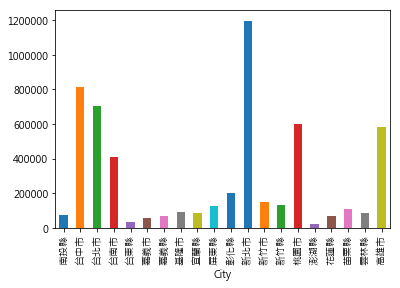

In [14]:
df_clean_city=df_clean.groupby(by='City')['Quantity'].sum()
df_clean_city.plot.bar()

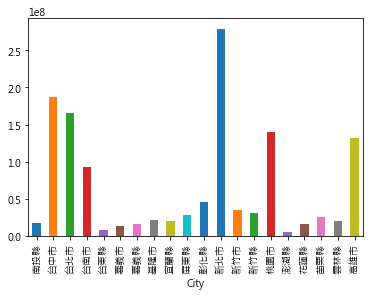

In [15]:
df_clean_city_pay=df_clean.groupby(by='City')['SalesOrderSlaveTotalPayment'].sum()
df_clean_city_pay.plot.bar()

In [16]:
df_clean_city_pay=df_clean_city_pay.to_frame().reset_index()
df_clean_city=df_clean_city.to_frame().reset_index()
df_clean_city_pay['Quantity']=df_clean_city['Quantity']
df_clean_city_pay

,City,SalesOrderSlaveTotalPayment,Quantity
0,南投縣,17134346.0,74939
1,台中市,187208076.0,815918
2,台北市,165698588.0,705464
3,台南市,92564746.0,407470
4,台東縣,8126489.0,35217
5,嘉義市,12708676.0,55276
6,嘉義縣,15366003.0,68262
7,基隆市,20754873.0,89367
8,宜蘭縣,20081791.0,87111
9,屏東縣,28304855.0,125897


In [18]:
def avgPay(pay, qua):
    l=[]
    for i in range(len(pay):
        e=pay[i]/qua[i]
        l.append(e)
    return l
Payment=df_clean_city_pay['SalesOrderSlaveTotalPayment'].tolist()
Quantity=df_clean_city_pay['Quantity'].tolist()
l=avgPay(Payment, Quantity)
df_clean_city_pay['VPQ']=l
df_clean_city_pay

,City,SalesOrderSlaveTotalPayment,Quantity,VPQ
0,南投縣,17134346.0,74939,228.643910
1,台中市,187208076.0,815918,229.444719
2,台北市,165698588.0,705464,234.878871
3,台南市,92564746.0,407470,227.169475
4,台東縣,8126489.0,35217,230.754721
5,嘉義市,12708676.0,55276,229.913091
6,嘉義縣,15366003.0,68262,225.103322
7,基隆市,20754873.0,89367,232.243143
8,宜蘭縣,20081791.0,87111,230.531058
9,屏東縣,28304855.0,125897,224.825492


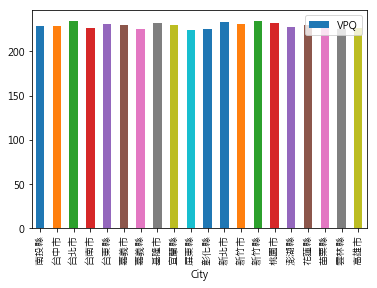

In [21]:
df_clean_city_pay.plot.bar(x='City', y='VPQ')

In [51]:
med=pd.read_excel('med.xls', '每人100-106')
med

,每人可支配所得中位數─按區域別分,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,年別,總平均,新北市,臺北市,桃園市,臺中市,臺南市,高雄市,宜蘭縣,新竹縣,...,南投縣,雲林縣,嘉義縣,屏東縣,臺東縣,花蓮縣,澎湖縣,基隆市,新竹市,嘉義市
2,100,233527,246807,331686,239605,221325,209357,225942,190229,253970,...,186515,190066,204799,201896,181402,218312,185071,241284,276744,196735
3,101,243131,248778,343274,256376,237194,213122,239305,227013,258290,...,200166,183816,220912,212635,195296,235994,209517,235621,294515,239554
4,102,250308,255104,341505,256415,245775,218320,255310,220648,262309,...,205953,212541,202478,204270,223428,214120,217111,259784,293219,265808
5,103,259926,262298,354247,273843,261689,228481,254648,241791,263133,...,210877,214592,209909,218026,231020,216797,259262,261878,310337,276010
6,104,266490,275425,363360,271761,268966,230392,277245,258872,254492,...,210930,219715,218707,222704,217543,232776,222637,283396,280389,246260
7,105,276981,293483,371563,281358,276247,245090,255844,260027,277910,...,222014,225495,215502,227162,228747,239397,248480,271870,337822,268288
8,106,284228,303193,372359,291563,279575,247609,276946,257319,292985,...,227910,231476,228118,252189,257277,263489,242570,288041,331922,268553
9,資料來源：行政院主計總處家庭收支調查,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
med.drop('每人可支配所得中位數─按區域別分',axis = 1,inplace=True)
med.drop('Unnamed: 1',axis = 1,inplace=True)
med

,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,新北市,臺北市,桃園市,臺中市,臺南市,高雄市,宜蘭縣,新竹縣,苗栗縣,彰化縣,南投縣,雲林縣,嘉義縣,屏東縣,臺東縣,花蓮縣,澎湖縣,基隆市,新竹市,嘉義市
2,246807,331686,239605,221325,209357,225942,190229,253970,206302,186197,186515,190066,204799,201896,181402,218312,185071,241284,276744,196735
3,248778,343274,256376,237194,213122,239305,227013,258290,206195,200978,200166,183816,220912,212635,195296,235994,209517,235621,294515,239554
4,255104,341505,256415,245775,218320,255310,220648,262309,226340,202945,205953,212541,202478,204270,223428,214120,217111,259784,293219,265808
5,262298,354247,273843,261689,228481,254648,241791,263133,211057,201718,210877,214592,209909,218026,231020,216797,259262,261878,310337,276010
6,275425,363360,271761,268966,230392,277245,258872,254492,225573,217274,210930,219715,218707,222704,217543,232776,222637,283396,280389,246260
7,293483,371563,281358,276247,245090,255844,260027,277910,247475,235181,222014,225495,215502,227162,228747,239397,248480,271870,337822,268288
8,303193,372359,291563,279575,247609,276946,257319,292985,250215,219430,227910,231476,228118,252189,257277,263489,242570,288041,331922,268553
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
med.loc[1].tolist()

['新北市',
 '臺北市',
 '桃園市',
 '臺中市',
 '臺南市',
 '高雄市',
 '宜蘭縣',
 '新竹縣',
 '苗栗縣',
 '彰化縣',
 '南投縣',
 '雲林縣',
 '嘉義縣',
 '屏東縣',
 '臺東縣',
 '花蓮縣',
 '澎湖縣',
 '基隆市',
 '新竹市',
 '嘉義市']

In [65]:
City_Salary=pd.DataFrame()
City_Salary['City']=med.loc[1]
City_Salary['Salary']=med.loc[8]
City_Salary=City_Salary.reset_index()
City_Salary.drop('index',axis = 1,inplace=True)
City_Salary

,City,Salary
0,新北市,303193
1,臺北市,372359
2,桃園市,291563
3,臺中市,279575
4,臺南市,247609
5,高雄市,276946
6,宜蘭縣,257319
7,新竹縣,292985
8,苗栗縣,250215
9,彰化縣,219430


In [71]:
D=dict(zip(City_Salary['City'],City_Salary['Salary']))
D

{'新北市': 303193,
 '臺北市': 372359,
 '桃園市': 291563,
 '臺中市': 279575,
 '臺南市': 247609,
 '高雄市': 276946,
 '宜蘭縣': 257319,
 '新竹縣': 292985,
 '苗栗縣': 250215,
 '彰化縣': 219430,
 '南投縣': 227910,
 '雲林縣': 231476,
 '嘉義縣': 228118,
 '屏東縣': 252189,
 '臺東縣': 257277,
 '花蓮縣': 263489,
 '澎湖縣': 242570,
 '基隆市': 288041,
 '新竹市': 331922,
 '嘉義市': 268553}

In [73]:
D['臺北市']

372359

In [75]:
def Salary(City):
    if City[0] == '台':
        City = '臺'+City[1:] #字串無法直接指定, ex:site[k] = '臺'
    return D[City]
df_clean_city_pay['Salary']=df_clean_city_pay['City'].apply(Salary)
df_clean_city_pay

,City,SalesOrderSlaveTotalPayment,Quantity,VPQ,Salary
0,南投縣,17134346.0,74939,228.643910,227910
1,台中市,187208076.0,815918,229.444719,279575
2,台北市,165698588.0,705464,234.878871,372359
3,台南市,92564746.0,407470,227.169475,247609
4,台東縣,8126489.0,35217,230.754721,257277
5,嘉義市,12708676.0,55276,229.913091,268553
6,嘉義縣,15366003.0,68262,225.103322,228118
7,基隆市,20754873.0,89367,232.243143,288041
8,宜蘭縣,20081791.0,87111,230.531058,257319
9,屏東縣,28304855.0,125897,224.825492,252189


In [104]:
population=pd.read_excel('y0s100000.xls', '105')
population

,表一 各縣市人口數按性別及五歲年齡組分,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28
0,NaN,NaN,NaN,NaN,NaN,NaN,中華民國105年底,NaN,NaN,NaN,...,NaN,中華民國105年底,NaN,NaN,NaN,NaN,NaN,NaN,NaN,單位：人
1,區 域 別,性別,總 計,0.0,NaN,NaN,1～4,NaN,NaN,5～9,...,55～59,60～64,65～69,70～74,75～79,80～84,85～89,90～94,95～99,100+
2,NaN,NaN,NaN,NaN,小 計,1.0,2,3.0,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,計,23539816,196873.0,866190,216007.0,214590,197963.0,237630.0,971266,...,1756657,1554074,1118221,663987,579794,387717,241771,91542,20005,3068
4,總 計,男,11719270,102046.0,448603,112299.0,110764,102610.0,122930.0,506111,...,861044,752645,533682,307929,256390,167699,114543,42154,8597,1404
5,NaN,女,11820546,94827.0,417587,103708.0,103826,95353.0,114700.0,465155,...,895613,801429,584539,356058,323404,220018,127228,49388,11408,1664
6,NaN,計,3979208,31556.0,138288,34607.0,34851,31347.0,37483.0,160783,...,312936,278689,192041,102640,77878,46959,30195,12555,3086,555
7,新 北 市,男,1952341,16287.0,71574,17960.0,17898,16320.0,19396.0,83843,...,146070,129691,89921,47584,33800,20255,15046,6216,1527,279
8,NaN,女,2026867,15269.0,66714,16647.0,16953,15027.0,18087.0,76940,...,166866,148998,102120,55056,44078,26704,15149,6339,1559,276
9,NaN,計,2695704,26809.0,122806,30508.0,31212,28440.0,32646.0,111067,...,201803,194576,152844,88216,72967,49602,34799,15934,4058,710


In [112]:
pop=population['Unnamed: 2']
pop=pop[6:77:3]
pop=pop.tolist()

In [113]:
popcity=population['表一  各縣市人口數按性別及五歲年齡組分']
popcity=popcity[7:77:3]
def replacespace(a):
    return a.replace(' ','')    
popcity=popcity.apply(replacespace)
popcity=popcity.tolist()

In [114]:
City_population=pd.DataFrame()
City_population['City']=popcity
City_population['population']=pop
City_population=City_population.reset_index()
City_population.drop('index',axis=1,inplace=True)
City_population

,City,population
0,新北市,3979208
1,臺北市,2695704
2,桃園市,2147763
3,臺中市,2767239
4,臺南市,1886033
5,高雄市,2779371
6,臺灣省,7136789
7,宜蘭縣,457538
8,新竹縣,547481
9,苗栗縣,559189


In [115]:
P=dict(zip(City_population['City'],City_population['population']))
P

{'新北市': 3979208,
 '臺北市': 2695704,
 '桃園市': 2147763,
 '臺中市': 2767239,
 '臺南市': 1886033,
 '高雄市': 2779371,
 '臺灣省': 7136789,
 '宜蘭縣': 457538,
 '新竹縣': 547481,
 '苗栗縣': 559189,
 '彰化縣': 1287146,
 '南投縣': 505163,
 '雲林縣': 694873,
 '嘉義縣': 515320,
 '屏東縣': 835792,
 '臺東縣': 220802,
 '花蓮縣': 330911,
 '澎湖縣': 103263,
 '基隆市': 372100,
 '新竹市': 437337,
 '嘉義市': 269874,
 '福建省': 147709,
 '金門縣': 135114,
 '連江縣': 12595}

In [116]:
def Population(City):
    if City[0] == '台':
        City = '臺'+City[1:] #字串無法直接指定, ex:site[k] = '臺'
    return P[City]
df_clean_city_pay['population']=df_clean_city_pay['City'].apply(Population)
df_clean_city_pay

,City,SalesOrderSlaveTotalPayment,Quantity,VPQ,Salary,population
0,南投縣,17134346.0,74939,228.643910,227910,505163
1,台中市,187208076.0,815918,229.444719,279575,2767239
2,台北市,165698588.0,705464,234.878871,372359,2695704
3,台南市,92564746.0,407470,227.169475,247609,1886033
4,台東縣,8126489.0,35217,230.754721,257277,220802
5,嘉義市,12708676.0,55276,229.913091,268553,269874
6,嘉義縣,15366003.0,68262,225.103322,228118,515320
7,基隆市,20754873.0,89367,232.243143,288041,372100
8,宜蘭縣,20081791.0,87111,230.531058,257319,457538
9,屏東縣,28304855.0,125897,224.825492,252189,835792


In [118]:
def QPP(Q, P):
    l=[]
    for i in range(len(Q)):
        qpp=Q[i]/P[i]
        l.append(qpp)
    return l
population=df_clean_city_pay['population'].tolist()
Quantity=df_clean_city_pay['Quantity'].tolist()
l=QPP(Quantity,population)
df_clean_city_pay['QPP']=l
df_clean_city_pay

,City,SalesOrderSlaveTotalPayment,Quantity,VPQ,Salary,population,QPP
0,南投縣,17134346.0,74939,228.643910,227910,505163,0.148346
1,台中市,187208076.0,815918,229.444719,279575,2767239,0.294849
2,台北市,165698588.0,705464,234.878871,372359,2695704,0.261699
3,台南市,92564746.0,407470,227.169475,247609,1886033,0.216046
4,台東縣,8126489.0,35217,230.754721,257277,220802,0.159496
5,嘉義市,12708676.0,55276,229.913091,268553,269874,0.204822
6,嘉義縣,15366003.0,68262,225.103322,228118,515320,0.132465
7,基隆市,20754873.0,89367,232.243143,288041,372100,0.240169
8,宜蘭縣,20081791.0,87111,230.531058,257319,457538,0.190391
9,屏東縣,28304855.0,125897,224.825492,252189,835792,0.150632


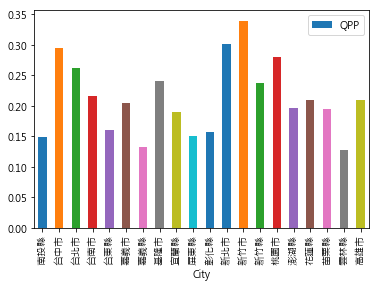

In [121]:
df_clean_city_pay.plot.bar(x='City', y='QPP')

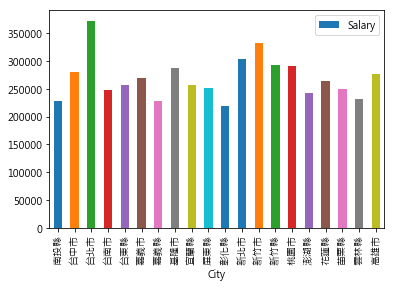

In [125]:
df_clean_city_pay.plot.bar(x='City', y='Salary', label='Salary')

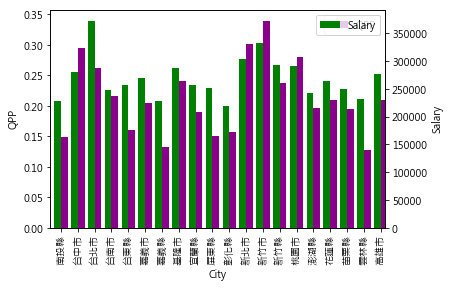

In [184]:
ax1 = df_clean_city_pay.plot.bar(x='City', y='QPP',position=0,color='darkmagenta',label='QPP',width=0.4)
ax1.set_ylabel('QPP')
ax2 = ax1.twinx()
ax2.set_ylabel('Salary')
df_clean_city_pay.plot.bar(x='City', y='Salary',color='Green',position=1,label='Salary',ax=ax2,width=0.4)